In [15]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from cartiflette import carti_download


In [10]:
# -------------------------------
# Téléchargement du fichier
# -------------------------------
url = "https://www.data.gouv.fr/api/1/datasets/r/aff9d702-db6d-46e5-8416-c032d8b9d89d"

response = requests.get(url)

if response.status_code == 200:
    with open("data_arcom.xlsx", "wb") as file:
        file.write(response.content)
    print("Téléchargement réussi !")
else:
    print("Erreur :", response.status_code)

df_brut = pd.read_excel("data_arcom.xlsx")
print(df_brut.head())
obs = df_brut.shape[0]
print(f"Nombre d'observations : {obs}")


Téléchargement réussi !
        SEXE  AGE       RAGE1        RAGE2        RAGE3          AGGLOIFOP0  \
0  Une femme   25  De25a34ans  De25a34ans1  De15a34ans2                UU05   
1   Un homme   64  De50a64ans  De50a64ans1    De50aPlus                UU02   
2  Une femme   35  De35a49ans  De35a49ans1  De35a49ans2  Hors unité urbaine   
3  Une femme   65  De65a74ans    De65aPlus    De50aPlus                UU06   
4   Un homme   40  De35a49ans  De35a49ans1  De35a49ans2                UU06   

  jz2cdep  jz2ctypcom  jz2ctailcom AGGLOIFOP0.1  ...  \
0      42           1            9         TUU5  ...   
1      44           3            3         TUU2  ...   
2      70           6            1         TUU0  ...   
3      64           1           10         TUU6  ...   
4      30           1           11         TUU6  ...   

                                            RS18_r12  \
0                                                NaN   
1                                                NaN

In [ ]:
variables = [
    "SEXE", "AGE", "AGGLOIFOP2", "TYPCOM", "TAILCOM", "DPT", "REG3", "REG13", 
    "SITI", "PPIA", "RECPPIA", "STCA", "STATUT", "FOYER", 
    #Q1 quel produit avez-vous consommé de manière dématérialisée ces 12 derniers mois ?
    "Q1_1", "Q1_2", "Q1_3", "Q1_4", "Q1_5", "Q1_6", "Q1_7", "Q1_8", "Q1_9", "Q1_10", "Q1_11", 
    #Q2 : à quelle fréquence ?
    "Q2_r1", "Q2_r2", "Q2_r3", "Q2_r4", "Q2_r5", "Q2_r6", "Q2_r7", "Q2_r8", "Q2_r9", "Q2_r10", "Q2_r11", 
    #Q2BIS : regardez-vous des vidéos de courtes durée proposées par Youtube?
    "Q2BIS",
    #Q3 : consommation légale ? (globalité)
    "Q3",
    #Q4 : consommation légale ? globalité dans le cadre des activités proposées question1
    "Q4",
    #Q5_r : consommation légale pour chaque activité
    "Q5_r1", "Q5_r2", "Q5_r3", "Q5_r4", "Q5_r5", "Q5_r6", "Q5_r7", "Q5_r8", "Q5_r9", "Q5_r10", "Q5_r11", 
    #Q6 : fréquence de conso illégale
    "Q6_r1", "Q6_r2", "Q6_r3", "Q6_r4", "Q6_r5", "Q6_r6", "Q6_r7", "Q6_r8", "Q6_r9", "Q6_r10", "Q6_r11", 
    #QBOL14 : comment découvrez-vous de nouveaux films ?
    "QBOL14_1", "QBOL14_2", "QBOL14_3", "QBOL14_4", "QBOL14_5", "QBOL14_6", "QBOL14_7", "QBOL14_8", "QBOL14_9", 
    #QBU1 : consommation payante ou gratuite ?
    "QBU1_r1", "QBU1_r2", "QBU1_r3", "QBU1_r4", "QBU1_r5", "QBU1_r6", "QBU1_r7", "QBU1_r8", "QBU1_r9", "QBU1_r10", "QBU1_r11", 
    #QBU7 : 3 principales raisons de ne pas consommer légalement
    "QBU7_r1_c1", "QBU7_r2_c1", "QBU7_r3_c1", "QBU7_r4_c1", "QBU7_r5_c1", "QBU7_r6_c1", "QBU7_r7_c1", "QBU7_r8_c1", "QBU7_r9_c1", "QBU7_r10_c1", "QBU7_r11_c1", "QBU7_r12_c1", "QBU7_r13_c1", "QBU7_r14_c1", "QBU7_r15_c1", "QBU7_r16_c1", 
    #RS14 : quel service avez vous accès pour écouter de la musique
    "RS14_1", "RS14_2", "RS14_3", "RS14_4", "RS14_5", "RS14_6", "RS14_7", "RS14_8", "RS14_9"
]

df_cleaned = df_brut[variables]

df_cleaned.replace({"#NUL!": np.nan, "": np.nan, " ": np.nan}, inplace=True)
df_cleaned = df_cleaned.applymap(lambda x: x.strip() if isinstance(x, str) else x)  # retirer les espaces au début et à la fin des string pour le recodage au cas où

df = pd.DataFrame([])

# Sexe
sexe_map = {"Une femme": 0, "Un homme": 1}
df["sexe"] = df_cleaned["SEXE"].map(sexe_map)

df["age"]=df_cleaned["AGE"]

agglo_map = {"MoinsDe100000Habitants":0, "PlusDe100000Habitants":1}
df["plusde10000habitants"] = df_cleaned["AGGLOIFOP2"].map(agglo_map)

df["type_commune"] = df_cleaned["TYPCOM"]

df["taille_commune"] = df_cleaned["TAILCOM"]

df["departement"] = df_cleaned["DPT"]

province_map = {"RegionIleDeFrance":0, "PROVINCE":1}
df["province"] = df_cleaned["REG3"].map(province_map)

df["region"] = df_cleaned["REG13"]

df["situation_actuelle"] = df_cleaned["SITI"]

df["profession"] = df_cleaned["PPIA"]

df["csp"] = df_cleaned["RECPPIA"]

df["statut"] = df_cleaned["STATUT"]

df["foyer"] = df_cleaned["FOYER"]

df[["conso_demat_mus", "conso_demat_films", "conso_demat_series", "conso_demat_photos", "conso_demat_jv", "conso_demat_livres", "conso_demat_logi", "conso_demat_presse", "conso_demat_retrans"]] = df_cleaned[["Q1_1", "Q1_2", "Q1_3", "Q1_4", "Q1_5", "Q1_6", "Q1_7", "Q1_8", "Q1_9"]]
df[["conso_demat_mus", "conso_demat_films", "conso_demat_series", "conso_demat_photos", "conso_demat_jv", "conso_demat_livres", "conso_demat_logi", "conso_demat_presse", "conso_demat_retrans"]] = df[["conso_demat_mus", "conso_demat_films", "conso_demat_series", "conso_demat_photos", "conso_demat_jv", "conso_demat_livres", "conso_demat_logi", "conso_demat_presse", "conso_demat_retrans"]].applymap(lambda x: 1 if isinstance(x, str) and x.strip() != "" else 0)

df[["freq_demat_mus", "freq_demat_films", "freq_demat_series", "freq_demat_photos", "freq_demat_jv", "freq_demat_livres", "freq_demat_logi", "freq_demat_presse", "freq_demat_retrans"]] = df_cleaned[["Q2_r1", "Q2_r2", "Q2_r3", "Q2_r4", "Q2_r5", "Q2_r6", "Q2_r7", "Q2_r8", "Q2_r9"]]

#df[["var_fr", "poprock", "rap", "classique", "jazz", "dance", "electro", "metal", "rnb", "soul", "reggae", "musique_monde"]] 


legal_map = {"Exclusivement de façon légale" : 1, "Exclusivement de façon illégale":0, "Les deux, légalement et illégalement":0.5}
df["legal"] = df_cleaned["Q3"].map(legal_map)

df["legal_culture"] = df_cleaned["Q4"]

print(df.head())



# Verif donnees manquantes
# -------------------------------
print("\nValeurs manquantes par colonne :")
print(df.isna().sum().to_string())

print("\nPourcentage de valeurs manquantes :")
print((df.isna().mean() * 100).to_string())

# -------------------------------
# Statistiques descriptives
# -------------------------------
print("\n--- Variables numériques ---")
print(df.describe(include="number").T)

print("\n--- Variables catégorielles ---")
categorical_cols = df.select_dtypes(include="object").columns.tolist()
for col in categorical_cols:
    print(f"\nVariable : {col}")
    counts = df[col].value_counts(dropna=False)
    percentages = df[col].value_counts(normalize=True, dropna=False) * 100
    print(pd.concat([counts, percentages], axis=1, keys=["count", "percent"]))




   conso_demat_mus  conso_demat_films  conso_demat_series  conso_demat_photos  \
0                0                  0                   0                   0   
1                0                  0                   0                   1   
2                1                  1                   1                   1   
3                0                  0                   0                   0   
4                1                  1                   1                   0   

   conso_demat_jv  conso_demat_livres  conso_demat_logi  conso_demat_presse  \
0               0                   0                 0                   0   
1               0                   0                 1                   1   
2               1                   1                 1                   1   
3               0                   0                 0                   0   
4               1                   0                 0                   0   

   conso_demat_retrans             fre

/tmp/ipykernel_5614/2823379175.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.replace({"#NUL!": np.nan, "": np.nan, " ": np.nan}, inplace=True)
/tmp/ipykernel_5614/2823379175.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned = df_cleaned.applymap(lambda x: x.strip() if isinstance(x, str) else x)  # retirer les espaces au début et à la fin des string pour le recodage au cas où
/tmp/ipykernel_5614/2823379175.py:38: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[["conso_demat_mus", "conso_demat_films", "conso_demat_series", "conso_demat_photos", "conso_demat_jv", "conso_demat_livres", "conso_demat_logi", "conso_demat_presse", "conso_demat_retrans"]] = df[["conso_demat_mus", "conso_demat_films", "co

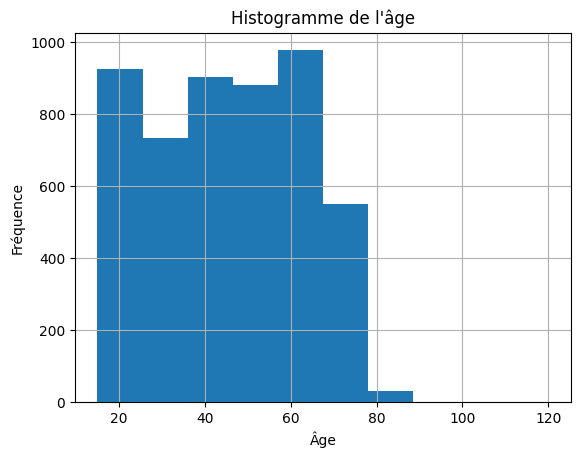

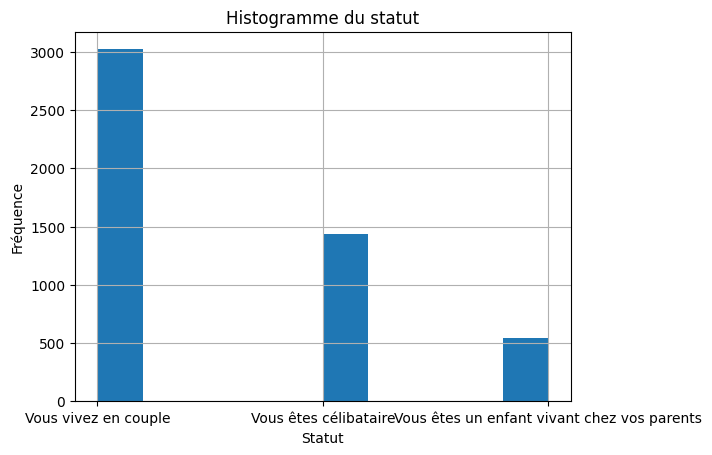

TypeError: '<=' not supported between instances of 'int' and 'str'

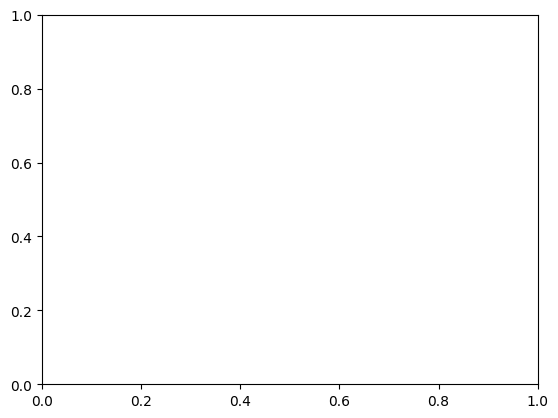

In [12]:

df["age"].hist()
plt.title("Histogramme de l'âge")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()

df["statut"].hist()
plt.title("Histogramme du statut")
plt.xlabel("Statut")
plt.ylabel("Fréquence")
plt.show()

df["conso_demat_mus"].hist()
plt.title("Histogramme de la fréquence d'écoute de musique dématérialisée")
plt.xlabel("Oui ou non")
plt.ylabel("Fréquence")
plt.show()

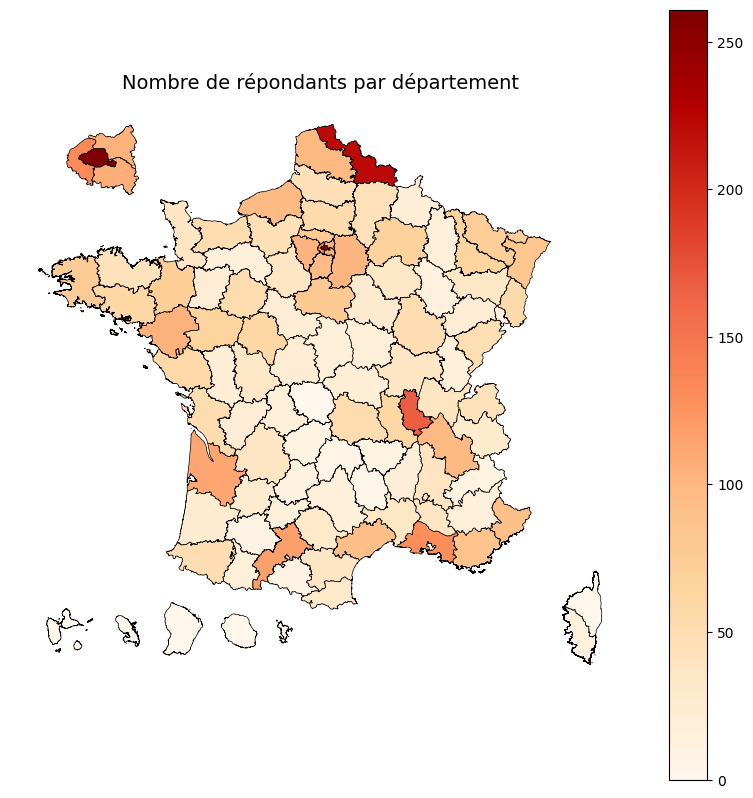

In [ ]:
departements = carti_download(
    values="France",
    crs=4326,
    borders="DEPARTEMENT",
    vectorfile_format="geojson",
    filter_by="FRANCE_ENTIERE_DROM_RAPPROCHES",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022,
)

df["departement"].unique()[:20]

departements_dict = {
    "AIN": "01", "AISNE": "02", "ALLIER": "03", "ALPESDEHAUTESPROVENCE": "04",
    "HAUTESALPES": "05", "ALPESMARITIMES": "06", "ARDECHE": "07", "ARDENNES": "08",
    "ARIEGE": "09", "AUBE": "10", "AUDE": "11", "AVEYRON": "12", "BOUCHESDURHONE": "13",
    "CALVADOS": "14", "CANTAL": "15", "CHARENTE": "16", "CHARENTEMARITIME": "17",
    "CHER": "18", "CORREZE": "19", "CORSES": "2A", "COTEOR": "21", "COTEDARMOR": "22",
    "CREUSE": "23", "DORDOGNE": "24", "DOUBS": "25", "DROME": "26", "EURE": "27",
    "EUREETLOIRE": "28", "FINISTERE": "29", "GARD": "30", "HAUTEGARONNE": "31",
    "GERS": "32", "GIRONDE": "33", "HERAULT": "34", "ILLEETVILAINE": "35",
    "INDRE": "36", "INDREETLOIRE": "37", "ISERE": "38", "JURA": "39", "LANDES": "40",
    "LOIRTCHER": "41", "LOIRE": "42", "HAUTELOIRE": "43", "LOIREATLANTIQUE": "44",
    "LOIRET": "45", "LOT": "46", "LOTETGARONNE": "47", "LOZERE": "48", "MAINEETLOIRE": "49",
    "MANCHE": "50", "MARNE": "51", "HAUTEMARNE": "52", "MAYENNE": "53", "MEURTHEETMOSELLE": "54",
    "MEUSE": "55", "MORBIHAN": "56", "MOSELLE": "57", "NIEVRE": "58", "NORD": "59",
    "OISE": "60", "ORNE": "61", "PASDECALAIS": "62", "PUYDEDOME": "63",
    "PYRENNEESATLANTIQUES": "64", "HAUTESPYRENNEES": "65", "PYRENNEESORIENTALES": "66",
    "BASRHIN": "67", "HAUTRHIN": "68", "RHONE": "69", "HAUTESAONE": "70",
    "SAONEETLOIRE": "71", "SARTHE": "72", "SAVOIE": "73", "HAUTESAVOIE": "74",
    "PARIS": "75", "SEINEMARITIME": "76", "SEINEETMARNE": "77", "YVELINES": "78",
    "DEUXSEVRES": "79", "SOMME": "80", "TARN": "81", "TARNETGARONNE": "82",
    "VAR": "83", "VAUCLUSE": "84", "VENDEE": "85", "VIENNE": "86", "HAUTEVIENNE": "87",
    "VOSGES": "88", "YONNE": "89", "BELFORT": "90", "ESSONNE": "91",
    "HAUTSDESEINE": "92", "SEINESAINTDENIS": "93", "VALDEMARNE": "94", "VALDOISE": "95"
}

df["dpt"] = df["departement"].map(departements_dict)

df[["departement", "dpt"]].head()

count_dep = df["dpt"].value_counts().reset_index()
count_dep.columns = ["INSEE_DEP", "nb_reponses"]

import geopandas as gpd

# Vérif CRS
departements = departements.to_crs(epsg=4326)

# Harmonisation de la clé
departements["INSEE_DEP"] = departements["INSEE_DEP"].astype(str)

departements_merged = departements.merge(
    count_dep,
    on="INSEE_DEP",
    how="left"
)

departements_merged["nb_reponses"] = departements_merged["nb_reponses"].fillna(0)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

departements_merged.plot(
    column="nb_reponses",
    cmap="OrRd",
    legend=True,
    linewidth=0.5,
    edgecolor="black",
    ax=ax
)

ax.set_title("Nombre de répondants par département", fontsize=14)
ax.axis("off")
plt.show()
